![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [11]:
# Start your code here
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu


women = pd.read_csv('women_results.csv', index_col=0)
men = pd.read_csv('men_results.csv', index_col=0)
print(women.head(), '\n')
print(men.head())

         date home_team  away_team  home_score  away_score        tournament
0  1969-11-01     Italy     France           1           0              Euro
1  1969-11-01   Denmark    England           4           3              Euro
2  1969-11-02   England     France           2           0              Euro
3  1969-11-02     Italy    Denmark           3           1              Euro
4  1975-08-25  Thailand  Australia           3           2  AFC Championship 

         date home_team away_team  home_score  away_score tournament
0  1872-11-30  Scotland   England           0           0   Friendly
1  1873-03-08   England  Scotland           4           2   Friendly
2  1874-03-07  Scotland   England           2           1   Friendly
3  1875-03-06   England  Scotland           2           2   Friendly
4  1876-03-04  Scotland   England           3           0   Friendly


In [12]:
#exploring the data to get insight into it

print(women.dtypes, "\n")
print(men.dtypes, "\n")
print(women.columns, "\n")
print(men.columns, "\n")
print(men.value_counts(), "\n")
print(women.value_counts(), "\n")
print(men.values, "\n")  # Removed parentheses after 'values'
print(women.values, "\n")

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object 

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object 

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object') 

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object') 

date        home_team     away_team       home_score  away_score  tournament                          
1872-11-30  Scotland      England         0           0           Friendly                                1
2007-06-02  Wales         Czech Republic  0           0           UEFA Euro qualification                 1
            South Africa  Chad            4           0           African Cup of Nations qualification    1
            South Korea   Netherlands     0           2    

In [13]:
#filtering the data frame
df_women = women.loc[(women['tournament'] == 'FIFA World Cup') & (women['date'] > '2002-01-01')]
df_men = men.loc[(men['tournament'] == 'FIFA World Cup') & (men['date'] > '2002-01-01')]
print(df_women.head(), '\n')
print(df_men.head())

            date      home_team  ... away_score      tournament
1600  2003-09-20        Nigeria  ...          3  FIFA World Cup
1601  2003-09-20         Norway  ...          0  FIFA World Cup
1602  2003-09-20        Germany  ...          1  FIFA World Cup
1603  2003-09-20          Japan  ...          0  FIFA World Cup
1604  2003-09-21  United States  ...          1  FIFA World Cup

[5 rows x 6 columns] 

             date            home_team  ... away_score      tournament
25164  2002-05-31               France  ...          1  FIFA World Cup
25165  2002-06-01              Germany  ...          0  FIFA World Cup
25166  2002-06-01  Republic of Ireland  ...          1  FIFA World Cup
25167  2002-06-01              Uruguay  ...          2  FIFA World Cup
25168  2002-06-02            Argentina  ...          0  FIFA World Cup

[5 rows x 6 columns]


In [14]:
#calculating the total goals scored by each group
df_women['goals_scored'] = df_women['home_score'] + df_women['away_score']
df_men['goals_scored'] = df_men['home_score'] + df_men['away_score']

print(df_women['goals_scored'].sum(), "\n")
print(df_men['goals_scored'].sum())

596 

965


(array([32., 82., 93., 90.,  0., 43., 23., 10.,  8.,  3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

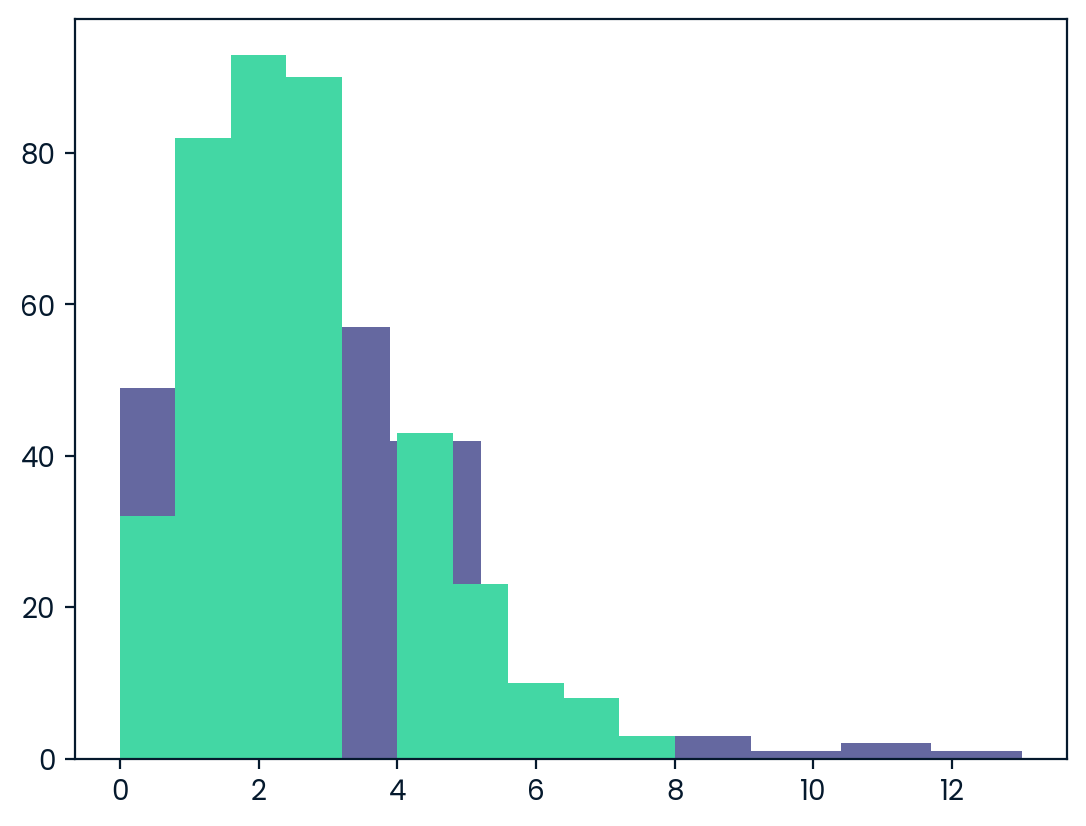

In [15]:
import matplotlib.pyplot as plt

plt.hist(x=df_women['goals_scored'], bins=10)
plt.hist(x=df_men['goals_scored'], bins=10)

In [16]:
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

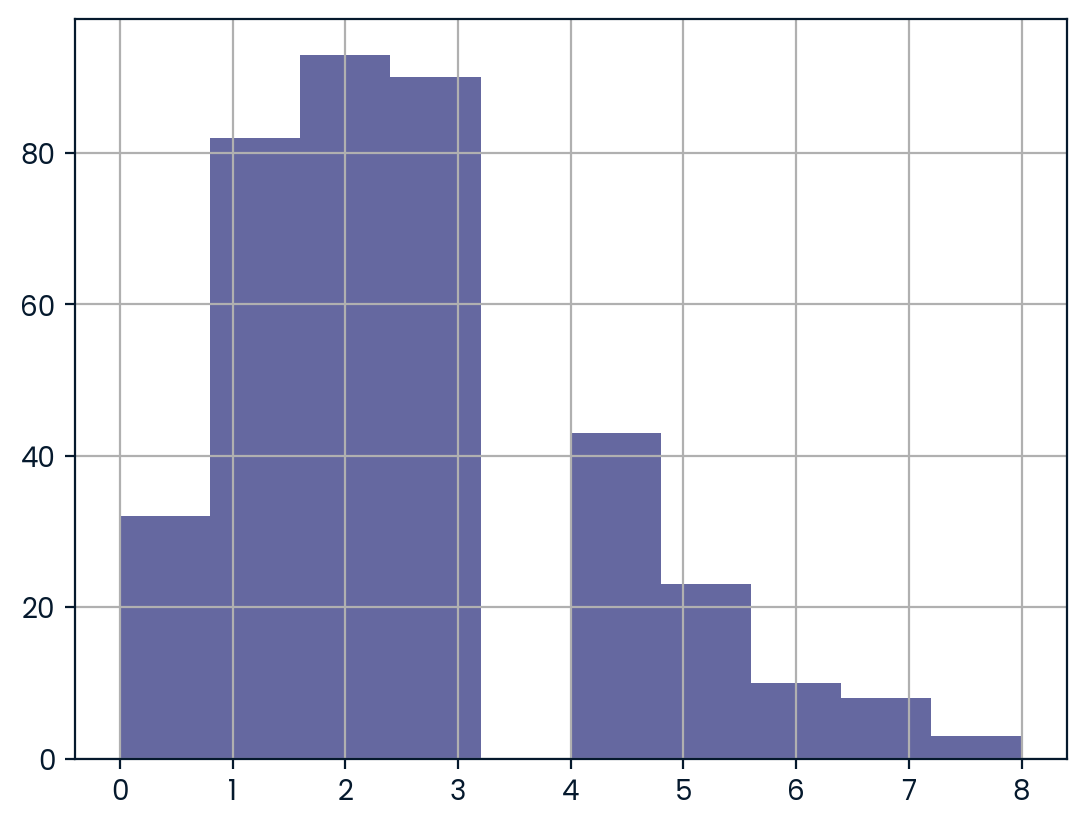

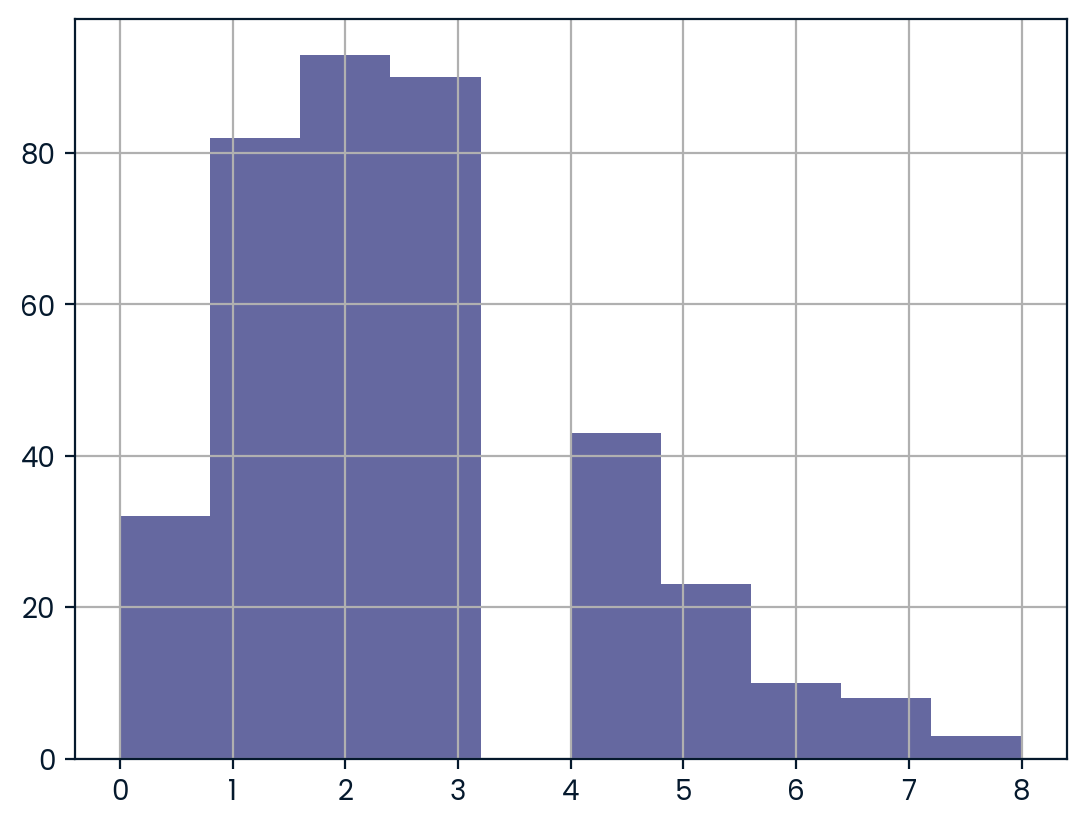

{'p_val': 0.005106609825443641, 'result': 'reject'}


<Figure size 640x480 with 0 Axes>

In [17]:


## Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.
men["date"] = pd.to_datetime(men["date"])
women["date"] = pd.to_datetime(women["date"])

men_data = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women_data = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

## Choosing the correct hypothesis test
men_data["group"] = "men"
women_data["group"] = "women"
men_data["goals_scored"] = men_data["home_score"] + men_data["away_score"]
women_data["goals_scored"] = women_data["home_score"] + women_data["away_score"]

## Determine normality using histograms
men_data["goals_scored"].hist()
plt.show()
plt.clf()

## Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_data["goals_scored"].hist()
plt.show()
plt.clf()

## Combine women's and men's data using pd.concat() and calculate goals scored in each match
both = pd.concat([women_data, men_data], axis=0, ignore_index=True)

## Transform the data for the pingouin Mann-Whitney U t-test
both_data = both[["goals_scored", "group"]]
both_subset_wide = both_data.pivot(columns="group", values="goals_scored")

## Perform right-tailed "greater" Wilcoxon-Mann-Whitney test with "pingouin"
results = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

## Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with "scipy"
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

## p-value.
p_val = results["p-val"].values[0]

## Hypoth. testing using sig. level 10 %
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result} 
print(result_dict)
#Reject null hypotheses